Importing the necessary libraries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

Loading the data corresponding to the three months (April/May/June) of 2016

In [43]:
df_apr = pd.read_csv('201604-citibike-tripdata.csv')
print("Dimensions of the April daataset:",df_apr.shape)

df_may = pd.read_csv('201605-citibike-tripdata.csv')
print("Dimensions of the May daataset:",df_may.shape)

df_jun = pd.read_csv('201606-citibike-tripdata.csv')
print("Dimensions of the June daataset:", df_jun.shape)

Dimensions of the April daataset: (1013149, 15)
Dimensions of the May daataset: (1212280, 15)
Dimensions of the June daataset: (1460318, 15)


Concatinating the three dataframes into one large dataset

In [44]:
df=pd.concat([df_apr,df_may,df_jun], axis=0)
# df.to_csv("threemontsdataset.csv")
print("Dimensions of the whole daataset:", df.shape)
df.head()

Dimensions of the whole daataset: (3685747, 15)


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,496,4/1/2016 00:00:26,4/1/2016 00:08:42,254,W 11 St & 6 Ave,40.735324,-73.998004,236,St Marks Pl & 2 Ave,40.728419,-73.987140,19704,Subscriber,1984.0,1
1,104,4/1/2016 00:00:27,4/1/2016 00:02:12,311,Norfolk St & Broome St,40.717227,-73.988021,350,Clinton St & Grand St,40.715595,-73.987030,21555,Subscriber,1970.0,1
2,128,4/1/2016 00:00:30,4/1/2016 00:02:38,3064,Myrtle Ave & Lewis Ave,40.696820,-73.937569,3059,Pulaski St & Marcus Garvey Blvd,40.693398,-73.939877,17430,Subscriber,1986.0,1
3,1197,4/1/2016 00:00:34,4/1/2016 00:20:31,3156,E 72 St & York Ave,40.766638,-73.953483,490,8 Ave & W 33 St,40.751551,-73.993934,17413,Subscriber,1981.0,1
4,419,4/1/2016 00:00:46,4/1/2016 00:07:46,116,W 17 St & 8 Ave,40.741776,-74.001497,405,Washington St & Gansevoort St,40.739323,-74.008119,16714,Subscriber,1982.0,2


In [45]:
# Identifying the data types of each column
print("Identifying the data types of all columns in the dataframe:")
df.dtypes

Identifying the data types of all columns in the dataframe:


tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                 float64
gender                       int64
dtype: object

In [46]:
# Identifying the null values
print("Identifying and counting the null values in the columns of the dataframe:")
df.isnull().sum()

Identifying and counting the null values in the columns of the dataframe:


tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
birth year                 501997
gender                          0
dtype: int64

Part A. Top originations:

Identifying the trips that ends at "Central Park South & 6th Ave"

In [47]:
df_cps_rtrns=df[df['end station name'].str.contains('Central Park S & 6 Ave')]
print("Filtering the trips where trips ends at Central Park South & 6th Ave:",df_cps_rtrns.shape[0])
df_cps_rtrns.head()

Filtering the trips where trips ends at Central Park South & 6th Ave: 20311


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
765,692,4/1/2016 05:44:20,4/1/2016 05:55:52,3156,E 72 St & York Ave,40.766638,-73.953483,2006,Central Park S & 6 Ave,40.765909,-73.976342,19476,Subscriber,1983.0,1
874,538,4/1/2016 06:01:00,4/1/2016 06:09:58,3172,W 74 St & Columbus Ave,40.778567,-73.977550,2006,Central Park S & 6 Ave,40.765909,-73.976342,16328,Subscriber,1958.0,1
1575,2469,4/1/2016 06:54:14,4/1/2016 07:35:24,359,E 47 St & Park Ave,40.755103,-73.974987,2006,Central Park S & 6 Ave,40.765909,-73.976342,15114,Subscriber,1988.0,2
2054,895,4/1/2016 07:22:34,4/1/2016 07:37:29,3147,E 85 St & 3 Ave,40.778012,-73.954071,2006,Central Park S & 6 Ave,40.765909,-73.976342,21659,Subscriber,1979.0,1
2680,1231,4/1/2016 07:46:40,4/1/2016 08:07:12,401,Allen St & Rivington St,40.720196,-73.989978,2006,Central Park S & 6 Ave,40.765909,-73.976342,18545,Subscriber,1986.0,1


In [48]:
vcs=pd.DataFrame(df_cps_rtrns['start station name'].value_counts())
# print(vcs.head())
print("Top 5 originations that returns bikes to Central Park S & 6 Ave:")
top_origins=vcs.index.tolist()
top_origins=top_origins[0:5]
for x in top_origins:
    print('\t', x, end='\n')

Top 5 originations that returns bikes to Central Park S & 6 Ave:
	 Central Park S & 6 Ave
	 Central Park West & W 85 St
	 5 Ave & E 78 St
	 Central Park West & W 72 St
	 5 Ave & E 73 St


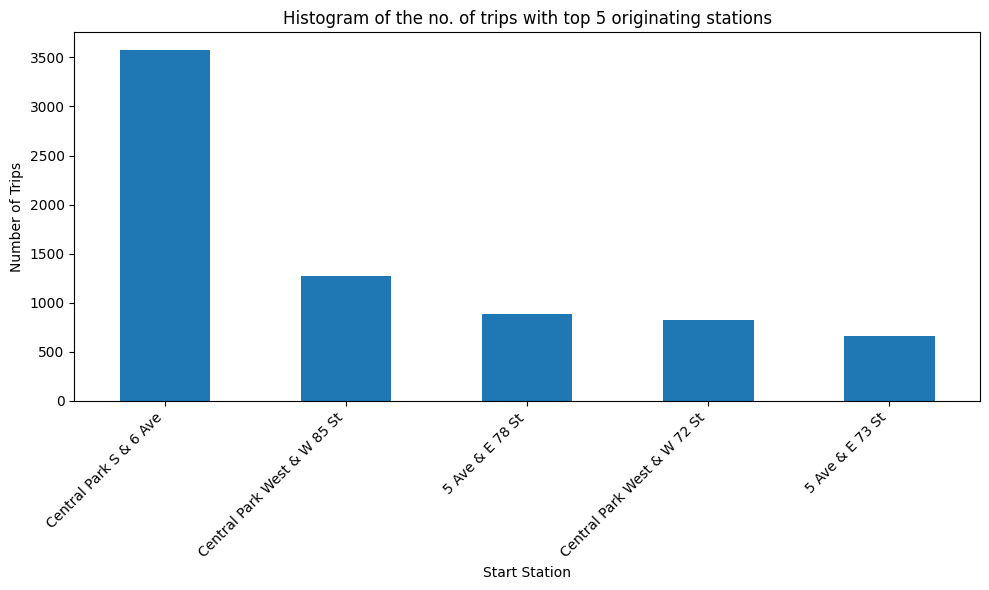

In [49]:
top_originations = df_cps_rtrns['start station name'].value_counts()

# Select the top N originations (e.g., top 10)
top_n = 5
top_originations = top_originations.head(top_n)

# Plot the top originations
plt.figure(figsize=(10, 6))
top_originations.plot(kind='bar')
plt.xlabel('Start Station')
plt.ylabel('Number of Trips')
plt.title(f'Histogram of the no. of trips with top {top_n} originating stations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Average Trip time for all riders return bikes to Central Park S & 6 Ave

In [50]:
# Performing Groupby operations by considering bikeid and tripduration
df_cps_rtrns_time=df_cps_rtrns[['tripduration','bikeid']]
# df_cps_rtrns_time.head()
# print(df_cps_rtrns_time.shape)
grd=df_cps_rtrns_time.groupby(['bikeid']).mean()

def int_min(data):
    return round(int(data)/60,2)

grd['tripduration']=grd['tripduration'].apply(int_min)
# print(grd.head())
# grd.to_csv('average_trip_time.csv')

t=grd['tripduration'].describe()['mean'].round(2)
print(f"Average time taken for each trip: {t} mins")

Average time taken for each trip: 30.68 mins


<Figure size 1000x600 with 0 Axes>

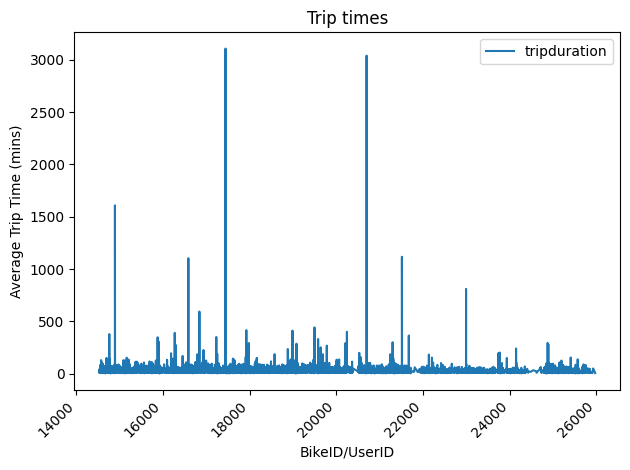

In [51]:
plt.figure(figsize=(10, 6))
grd.plot()
plt.xlabel('BikeID/UserID')
plt.ylabel('Average Trip Time (mins)')
plt.title(f'Trip times')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

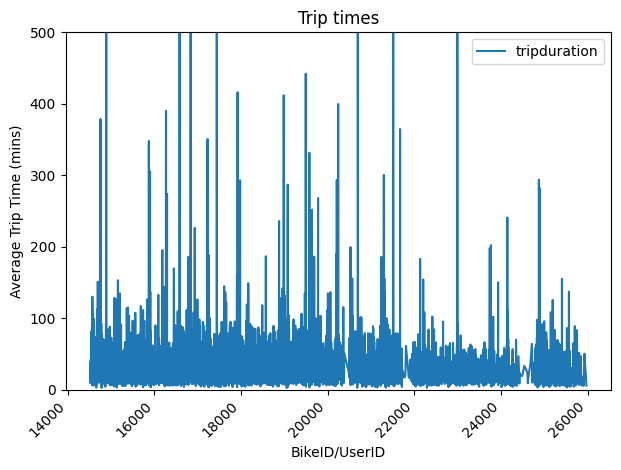

In [52]:
plt.figure(figsize=(10, 6))
grd.plot()
plt.xlabel('BikeID/UserID')
plt.ylabel('Average Trip Time (mins)')
plt.title(f'Trip times')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(0,500)
plt.show()

Station IDs that are corresponding to Top5 originations: 2006, 3168, 3143, 3165, 3137

In [53]:
mask=(df_cps_rtrns['start station id']==2006)|(df_cps_rtrns['start station id']==3168)|(df_cps_rtrns['start station id']==3143)|(df_cps_rtrns['start station id']==3165)|(df_cps_rtrns['start station id']==3137)
df_cps_rtrns_top5=df_cps_rtrns[mask]

Information about the Customer and Subscriber was obtained from the webiste https://citibikenyc.com/system-data

Text(0.5, 1.0, 'Customer(Pass_user) \n Subscriber(Annual Member)')

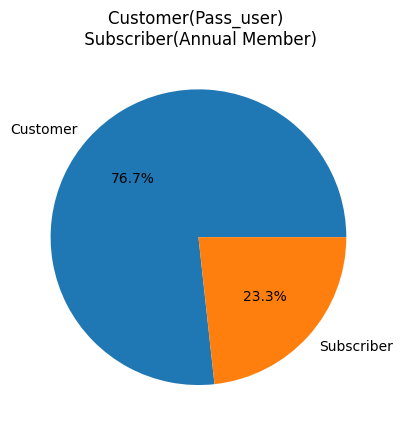

In [54]:
# print(df_cps_rtrns['usertype'].value_counts())
# [11297, 9014]
df_cps_rtrns_top5['usertype'].value_counts()
labels=['Customer','Subscriber']
values=[5540, 1680]
plt.pie(values, labels= labels, autopct='%1.1f%%')
plt.title("Customer(Pass_user) \n Subscriber(Annual Member)")

Top 5 originations that returns bikes to Central Park S & 6 Ave:

        Central Park S & 6 Ave
        Central Park West & W 85 St
        5 Ave & E 78 St
        Central Park West & W 72 St
        ​5 Ave & E 73 St

The average time taken for the each rider is approximately 30 mins.


Yes, this list will differ in subscribers and pass users. This list has 76.7% has customers and 22.3% were subscribers

Part B. Central Park lower loop:

City Bike recommends a central park lower loop on their website where users can take a bike from Central Park S & 6 Ave run around central park, and return the bike to the starting station The total distance of the suggested route is about 1.7 miles and takes most people 15-30 minutres on a bike.

A. Based on the information provided, estimate and visualize how many users possibly finish "central park lower loop" each day during this month.

In [55]:
pd.options.mode.chained_assignment = None
df=pd.concat([df_apr,df_may,df_jun], axis=0)

In [56]:
mask=(df['start station id']==2006)&(df['end station id']==2006)
df_2006=df[mask]
df_2006['tripduration_min']=df_2006['tripduration'].apply(lambda x: round(x/60))
print("Filtering the trip completing the Central Park Lower Loop:", df_2006.shape[0])
df_2006.head()

Filtering the trip completing the Central Park Lower Loop: 3576


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_min
8801,1461,4/1/2016 10:18:28,4/1/2016 10:42:49,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,16305,Customer,NaN,0,24
8853,1301,4/1/2016 10:20:49,4/1/2016 10:42:31,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,16686,Customer,NaN,0,22
8854,1315,4/1/2016 10:20:52,4/1/2016 10:42:47,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14558,Customer,NaN,0,22
10353,3060,4/1/2016 11:25:45,4/1/2016 12:16:45,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,18255,Customer,NaN,0,51
10367,3006,4/1/2016 11:26:13,4/1/2016 12:16:19,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,16953,Customer,NaN,0,50


In [57]:
time_mask=(df_2006['tripduration_min']>=15)&(df_2006['tripduration_min']<=30)
df_2006_filtered=df_2006[time_mask]
print("Filtering the trip completing the Central Park Lower Loop with in 15 to 30 mins:", df_2006_filtered.shape[0])
df_2006_filtered.head()

Filtering the trip completing the Central Park Lower Loop with in 15 to 30 mins: 739


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_min
8801,1461,4/1/2016 10:18:28,4/1/2016 10:42:49,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,16305,Customer,NaN,0,24
8853,1301,4/1/2016 10:20:49,4/1/2016 10:42:31,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,16686,Customer,NaN,0,22
8854,1315,4/1/2016 10:20:52,4/1/2016 10:42:47,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14558,Customer,NaN,0,22
18464,1116,4/1/2016 15:57:19,4/1/2016 16:15:55,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,16776,Customer,NaN,0,19
44734,1707,4/2/2016 15:46:37,4/2/2016 16:15:04,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,20312,Customer,NaN,0,28


Converting the starting time of the dataset to datetime format 

Creating the new columns corresponding to each day and each month

In [58]:
df_2006_filtered.loc[:,'start_time']=pd.to_datetime(df_2006_filtered['starttime'])
# df_2006_filtered
df_2006_filtered.loc[:,"month"]=df_2006_filtered["start_time"].dt.month
df_2006_filtered.loc[:,"day"]=df_2006_filtered["start_time"].dt.day
df_2006_filtered.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_min,start_time,month,day
8801,1461,4/1/2016 10:18:28,4/1/2016 10:42:49,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,16305,Customer,NaN,0,24,2016-04-01 10:18:28,4,1
8853,1301,4/1/2016 10:20:49,4/1/2016 10:42:31,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,16686,Customer,NaN,0,22,2016-04-01 10:20:49,4,1
8854,1315,4/1/2016 10:20:52,4/1/2016 10:42:47,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14558,Customer,NaN,0,22,2016-04-01 10:20:52,4,1
18464,1116,4/1/2016 15:57:19,4/1/2016 16:15:55,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,16776,Customer,NaN,0,19,2016-04-01 15:57:19,4,1
44734,1707,4/2/2016 15:46:37,4/2/2016 16:15:04,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,20312,Customer,NaN,0,28,2016-04-02 15:46:37,4,2


On an avg. no of trips taken per day in the April: 8


,month,day,no_trips
0,4,1,4
1,4,2,6
2,4,3,5
3,4,6,2
4,4,7,1


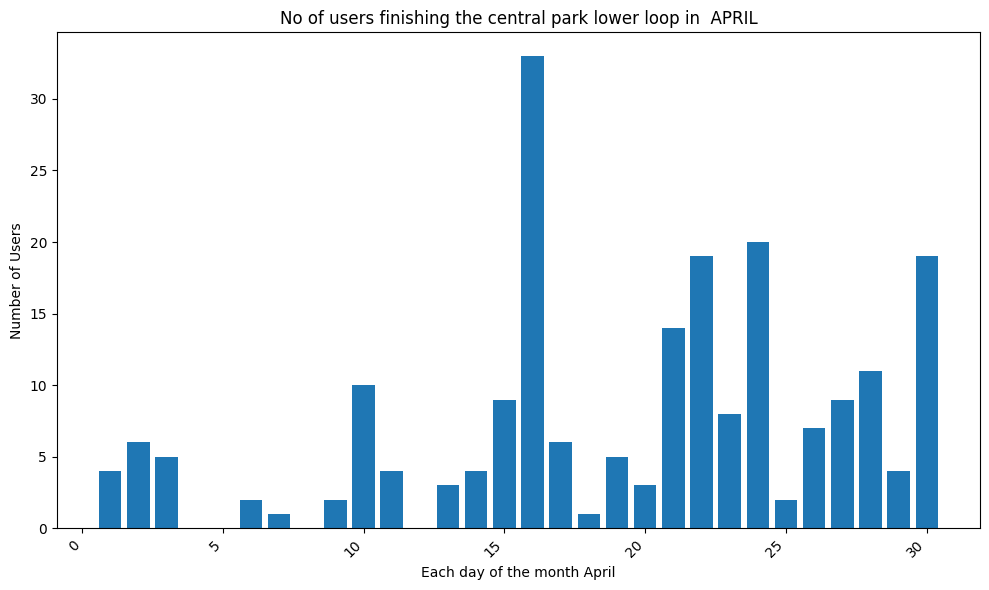

In [59]:
trip_count=df_2006_filtered.groupby(['month','day']).size().reset_index(name='no_trips')
trip_count_april=trip_count[trip_count['month']==4]
print('On an avg. no of trips taken per day in the April:', round(trip_count_april.describe().loc['mean','no_trips']))
display(trip_count_april.head())
plt.figure(figsize=(10, 6))
plt.bar(trip_count_april['day'],trip_count_april['no_trips'])
plt.xlabel('Each day of the month April')
plt.ylabel('Number of Users')
plt.title(f'No of users finishing the central park lower loop in  APRIL')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


On an avg. no of trips taken per day in the May: 9


,month,day,no_trips
26,5,1,4
27,5,2,7
28,5,3,1
29,5,4,2
30,5,5,2


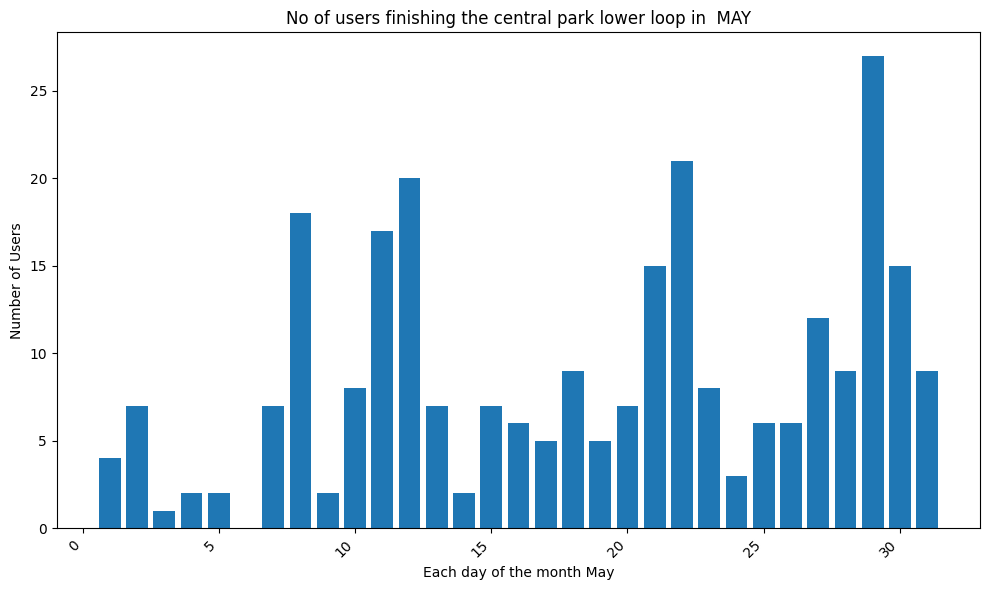

In [60]:
trip_count_may=trip_count[trip_count['month']==5]
print('\nOn an avg. no of trips taken per day in the May:',round(trip_count_may.describe().loc['mean','no_trips']))
display(trip_count_may.head())
plt.figure(figsize=(10, 6))
plt.bar(trip_count_may['day'],trip_count_may['no_trips'])
plt.xlabel('Each day of the month May')
plt.ylabel('Number of Users')
plt.title(f'No of users finishing the central park lower loop in  MAY')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


On an avg. no of trips taken per day in the June: 9


,month,day,no_trips
56,6,1,8
57,6,2,11
58,6,3,2
59,6,4,13
60,6,5,5


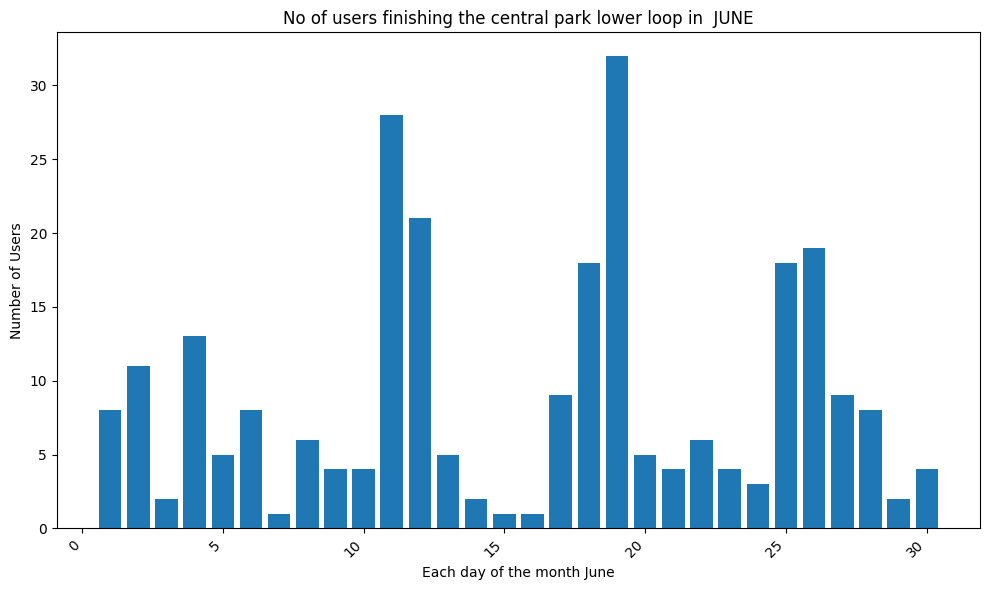

In [61]:
trip_count_june=trip_count[trip_count['month']==6]
print('\nOn an avg. no of trips taken per day in the June:', round(trip_count_june.describe().loc['mean','no_trips']))
display(trip_count_june.head())
plt.figure(figsize=(10, 6))
plt.bar(trip_count_june['day'],trip_count_june['no_trips'])
plt.xlabel('Each day of the month June')
plt.ylabel('Number of Users')
plt.title(f'No of users finishing the central park lower loop in  JUNE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Installing necessary libraries and packages ffor time-series analysis

pip install -U scikit-learn

pip install pmdarima

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import itertools
import statsmodels.api as sm
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
# Visualization libraries.
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline
import seaborn as sns
# import folium
from matplotlib.ticker import FixedFormatter
import matplotlib
# from folium import plugins
# Warnings 
import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

In [63]:
# concatinating the dataframes
df=pd.concat([df_apr,df_may,df_jun], axis=0)
# filtering the dataframes based starting and ending station id
mask=(df['start station id']==2006)&(df['end station id']==2006)
df_2006=df[mask]
# creating the new column trip duration column into mins
df_2006['tripduration_min']=df_2006['tripduration']/60
# filtering the dataframes based on the trip duration between 15 to 30 mins
time_mask=(df_2006['tripduration_min']>=15)&(df_2006['tripduration_min']<=30)
df_2006_filtered=df_2006[time_mask]
# using datetime module  to create month, day and date  columns
df_2006_filtered.loc[:,'start_time']=pd.to_datetime(df_2006_filtered['starttime'])
df_2006_filtered.loc[:,"month"]=df_2006_filtered["start_time"].dt.month
df_2006_filtered.loc[:,"day"]=df_2006_filtered["start_time"].dt.day
df_2006_filtered.loc[:,"date"]=df_2006_filtered["start_time"].dt.date
df_2006_filtered.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_min,start_time,month,day,date
8801,1461,4/1/2016 10:18:28,4/1/2016 10:42:49,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,16305,Customer,NaN,0,24.350000,2016-04-01 10:18:28,4,1,2016-04-01
8853,1301,4/1/2016 10:20:49,4/1/2016 10:42:31,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,16686,Customer,NaN,0,21.683333,2016-04-01 10:20:49,4,1,2016-04-01
8854,1315,4/1/2016 10:20:52,4/1/2016 10:42:47,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14558,Customer,NaN,0,21.916667,2016-04-01 10:20:52,4,1,2016-04-01
18464,1116,4/1/2016 15:57:19,4/1/2016 16:15:55,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,16776,Customer,NaN,0,18.600000,2016-04-01 15:57:19,4,1,2016-04-01
44734,1707,4/2/2016 15:46:37,4/2/2016 16:15:04,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,20312,Customer,NaN,0,28.450000,2016-04-02 15:46:37,4,2,2016-04-02


B. Build  predictive model that can forecast the  number of user's finishes the "central park lower loop" on a given day (i.e. each day during the first 7 days of july 2016, that is, jul 1st to Jul 7th)

,date,no_trips
0,2016-04-01,4
1,2016-04-02,6
2,2016-04-03,5
3,2016-04-06,2
4,2016-04-07,1


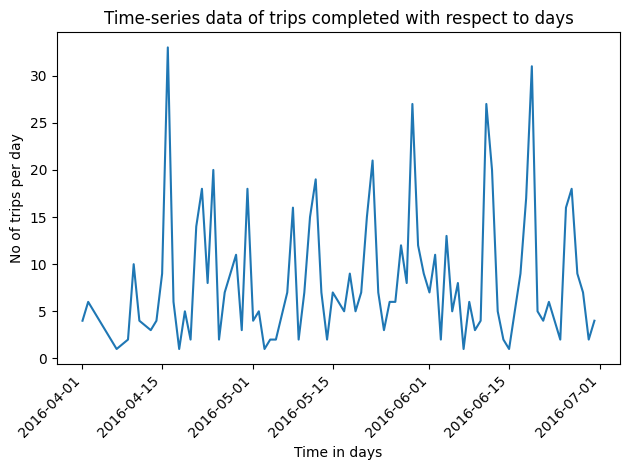

In [64]:
# creating the time-series dataset with number of trips per eachday
trip_count=df_2006_filtered.groupby(['date']).size().reset_index(name='no_trips')
display(trip_count.head())
plt.plot(trip_count['date'],trip_count['no_trips'])
plt.xlabel('Time in days')
plt.ylabel('No of trips per day')
plt.title(f'Time-series data of trips completed with respect to days')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [65]:
trip_count.set_index('date', inplace=True)
trip_count.head()

,no_trips
date,
2016-04-01,4
2016-04-02,6
2016-04-03,5
2016-04-06,2
2016-04-07,1


Checking wether the ARIMA model can do a good for forecast or not

Checking wether the Time-series data is statioanry or non-stationary

In [66]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(trip_count['no_trips'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
p_value= adf_result[1]
# Interpret the results
if p_value <= 0.05:
    print("The time series is likely stationary")
else:
    print("The time series is likely non-stationary")

ADF Statistic: -5.749629166885967
p-value: 6.008413311587467e-07
The time series is likely stationary


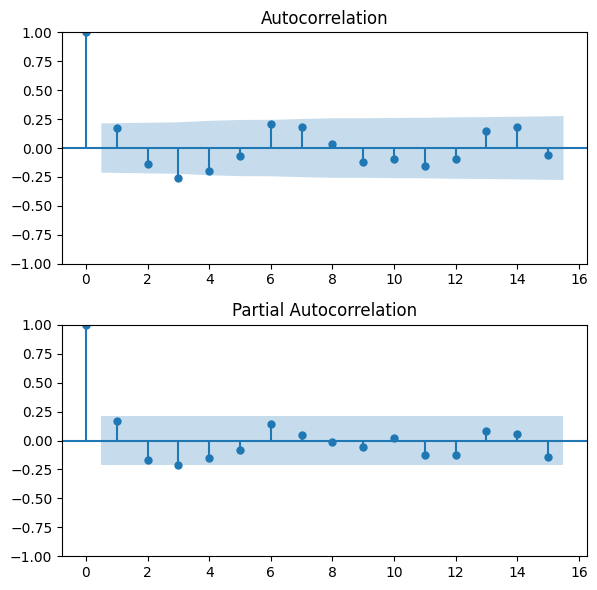

In [67]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plot_acf(trip_count['no_trips'], lags=15, ax=plt.gca())
plt.subplot(2, 1, 2)
plot_pacf(trip_count['no_trips'], lags=15, ax=plt.gca())
plt.tight_layout()
plt.show()

In [68]:
# Replace with appropriate values from ACF/PACF plots
from statsmodels.tsa.arima.model import ARIMA
p = 5
d = 1
q = 5
model = ARIMA(trip_count['no_trips'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               no_trips   No. Observations:                   85
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -277.235
Date:                Sat, 19 Aug 2023   AIC                            576.471
Time:                        15:39:35   BIC                            603.210
Sample:                             0   HQIC                           587.219
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2746      0.686     -0.401      0.689      -1.618       1.069
ar.L2         -0.7996      0.447     -1.787      0.074      -1.677       0.077
ar.L3         -0.2592      0.694     -0.374      0.7

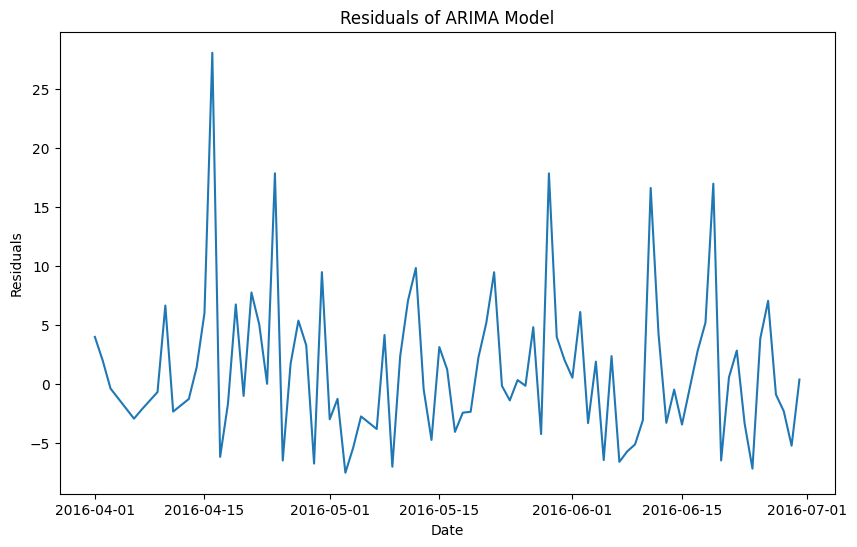

In [69]:
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals of ARIMA Model')
plt.show()

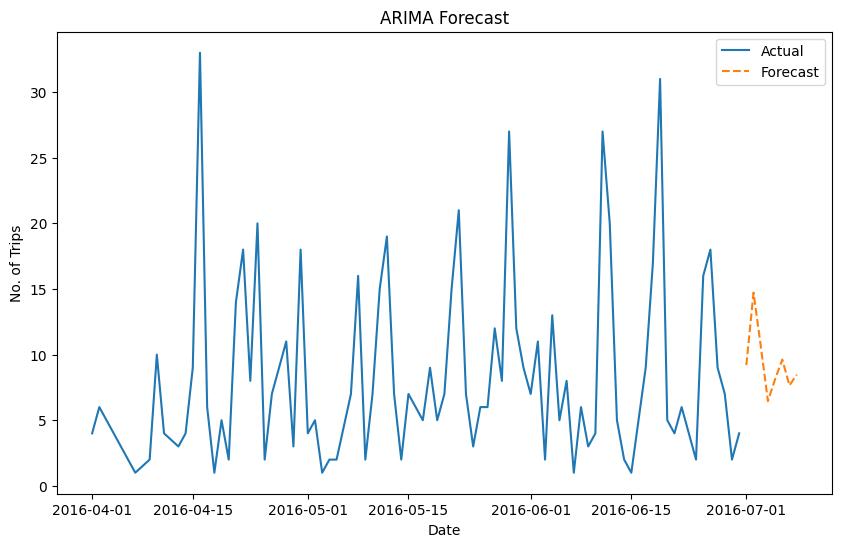

In [70]:
forecast_start = trip_count.index[-1] + pd.DateOffset(days=1)
forecast_end = forecast_start + pd.DateOffset(days=7)  # Forecast for the next 7 days
forecast = model_fit.forecast(steps=8)
plt.figure(figsize=(10, 6))
plt.plot(trip_count.index, trip_count['no_trips'], label='Actual')
plt.plot(pd.date_range(forecast_start, forecast_end), forecast, label='Forecast', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('No. of Trips')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

Check if the Auto-ARIMA selected models have the auto-correlation  of the residual of the initial 7 lags are not significantly different from 0


In [71]:
def plot_resid_acf(model):
    fig, ax = plt.subplots(figsize=(10, 7))
    plot_acf(model.resid(), lags =15,ax=ax,color ='#1f77b4',linewidth =0.1)
    plt.legend([('Shaded region = 95% CI')], fontsize='12')
    plt.ylabel("Residuals ACF",fontweight='bold', color = 'Black', fontsize='12', horizontalalignment='center')
    plt.xlabel("Lag", color = 'Black', fontsize='12',fontweight ="bold", horizontalalignment='center')
    plt.xticks( fontsize = 12, rotation=0, fontweight ="bold")
    plt.tick_params(axis = "x",colors = "black", direction = "out", length =4, width= 4)
    plt.tick_params(axis = "y",colors = "black", direction = "out", length =4, width= 4)
    plt.yticks( fontsize = 12, fontweight ="bold")
    plt.grid(linestyle=':', linewidth='1', color='black')
    plt.title(col,  fontsize = 12, fontweight ="bold")
    return plt.show()

The following function plots 60 day forecast obtained from the forecast dataframe created in the for loop after optimized model selected via auto-arima

In [72]:
def plot_forecast(dataframe):
    plt.figure(figsize=(10,7))
    plt.plot(dataframe["forecast"], "-", color = "#1f77b4", label = "forecast")
    plt.plot(dataframe["low"],color ="grey", linewidth =0.5,label = "_")
    plt.plot(dataframe["high"],color ="grey", linewidth =0.5,label = "_")
    lower_bound = dataframe["low"]
    upper_bound =dataframe["high"]
    plt.fill_between(dataframe.index, lower_bound, upper_bound, facecolor='grey', alpha=0.5,label="95% confidence interval")
    plt.plot(each_col, color = "red", label= 'Actual data')
    plt.title(col,  fontsize = 12, fontweight ="bold")
    plt.legend(loc="upper left", fontsize = 17)
    plt.xticks(fontsize = 12,fontweight ="bold",rotation = 35)
    plt.yticks( fontsize = 12,fontweight ="bold")
    xx, locs = plt.yticks()
    ll = ['%.0f' % a for a in xx]
    plt.gca().yaxis.set_major_formatter(FixedFormatter(ll))
    plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    return plt.show()

In [73]:
display(trip_count.head())
display(trip_count.tail())

,no_trips
date,
2016-04-01,4
2016-04-02,6
2016-04-03,5
2016-04-06,2
2016-04-07,1


,no_trips
date,
2016-06-26,18
2016-06-27,9
2016-06-28,7
2016-06-29,2
2016-06-30,4


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=649.453, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=603.594, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=622.068, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=602.983, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=603.358, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=575.471, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=575.875, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=573.547, Time=0.18 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=573.454, Time=0.21 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=575.179, Time=0.28 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=573.717, Time=0.19 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=601.820, Time=0.0

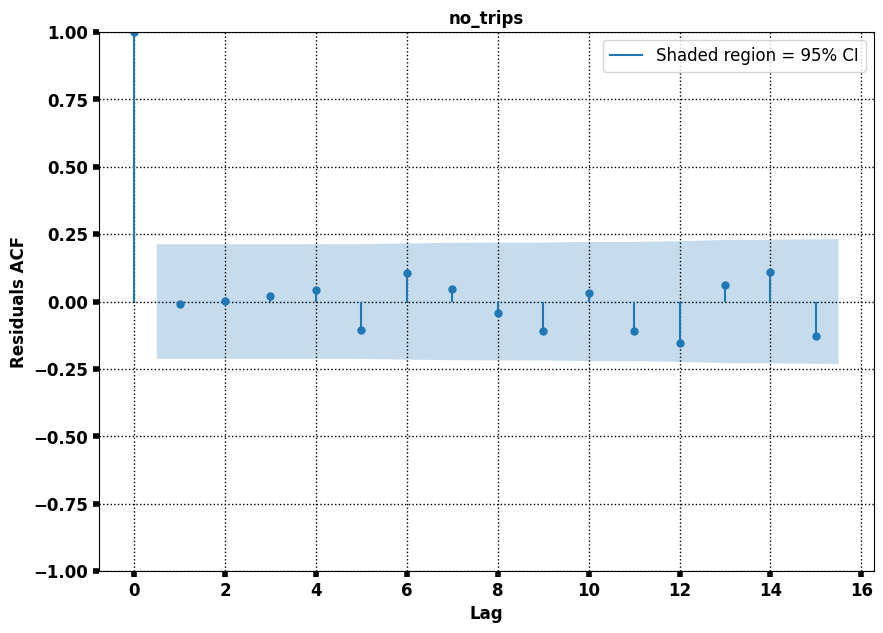

                 low       high   forecast
Date                                      
2016-07-01  4.577328  13.433793   9.005560
2016-07-02  6.134105  15.061742  10.597924
2016-07-03  5.964458  14.966715  10.465586
2016-07-04  4.355742  13.572415   8.964079
2016-07-05  3.033762  12.399958   7.716860
2016-07-06  2.873075  12.240054   7.556565
2016-07-07  3.320933  12.722947   8.021940
2016-07-08  3.857732  13.286153   8.571942


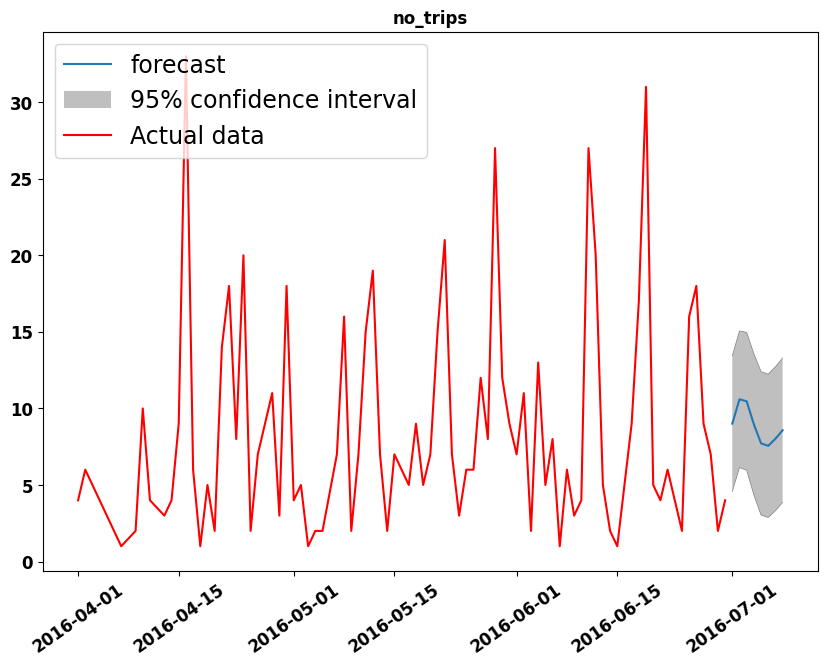

In [74]:
for col in trip_count.columns:
    each_col = trip_count[col]
    model = auto_arima(each_col, start_p= 1, max_p=4, max_d=4, start_q=1, max_q=4,seasonal=False,
                    trace =True, enforce_stationarity =False, enforce_invertibility =False,
                    error_action ="ignore", suppress_warnings =True,stepwise =True)
    # print(model.summary())
    results = model.fit(each_col)
    # Plot the autocorrelation of residuals using the function
    plot_resid_acf(results)
    forecast, conf_int = results.predict(8, return_conf_int=True, alpha=0.5)
    # display(forecast.tolist())
    forecast_df = pd.DataFrame(conf_int, columns=["low","high"])
    forecast_df["forecast"] = forecast.tolist()
    # display(forecast_df.head(10))

    forecast_df["Date"]= pd.date_range(start = "2016-07-01", end ="2016-07-08", freq = "D")
    forecast_df.set_index("Date", inplace =True)
    print(forecast_df.head(10))
    plot_forecast(forecast_df)

In [75]:
trip_count

,no_trips
date,
2016-04-01,4
2016-04-02,6
2016-04-03,5
2016-04-06,2
2016-04-07,1
...,...
2016-06-26,18
2016-06-27,9
2016-06-28,7


Validating the prediction against the test data

Root Mean Squared Error (RMSE): 5.54433771824632


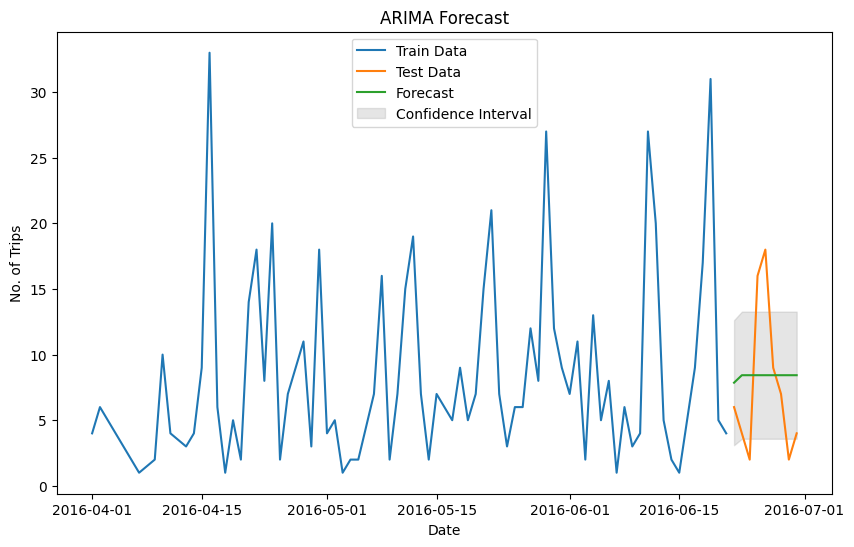

In [79]:
import pandas as pd
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

df = trip_count

# Split the data into train and test sets
train_size = int(len(df) * 0.90)  # 80% for training
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Fit an ARIMA model to the training data
model = auto_arima(train_data['no_trips'], seasonal=False, suppress_warnings=True)

# Forecast on the test data
n_forecast = len(test_data)
forecast, conf_int = model.predict(n_periods=n_forecast, return_conf_int=True, alpha=0.5)

# Calculate RMSE for the forecast
rmse = sqrt(mean_squared_error(test_data['no_trips'], forecast))
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['no_trips'], label='Train Data')
plt.plot(test_data.index, test_data['no_trips'], label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast')
plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2, label='Confidence Interval')
plt.legend()
plt.xlabel('Date')
plt.ylabel('No. of Trips')
plt.title('ARIMA Forecast')
plt.show()
